# CS5100 Group Project

### Import libraries

In [239]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,15
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

### Read the dataset

In [240]:
#Read the dataset for NFLX
df=pd.read_csv("NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-16,309.940002,310.489990,303.609985,306.019989,306.019989,8038600
1,2022-11-15,309.200012,312.709991,302.549988,310.200012,310.200012,14626900
2,2022-11-14,290.000000,311.000000,288.190002,299.269989,299.269989,17978200
3,2022-11-11,274.470001,290.660004,271.559998,290.130005,290.130005,9567300
4,2022-11-10,265.989990,275.359985,260.089996,274.970001,274.970001,9667300


In [241]:
#Read the dataset for AAPL
df1=pd.read_csv("AAPL.csv")
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80278500,AAPL
1,2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64218300,AAPL
2,2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300,AAPL
3,2022-11-14,148.970001,150.279999,147.429993,148.279999,148.279999,73374100,AAPL
4,2022-11-11,145.820007,150.009995,144.369995,149.699997,149.699997,93903800,AAPL


In [242]:
#Read the dataset for META
df2=pd.read_csv("META.csv")
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2022-11-17,110.410004,112.330002,109.800003,111.449997,111.449997,35017300,META
1,2022-11-16,114.500000,116.080002,112.660004,113.230003,113.230003,33287800,META
2,2022-11-15,116.070000,118.739998,114.410004,117.080002,117.080002,50670500,META
3,2022-11-14,110.989998,116.269997,110.800003,114.220001,114.220001,53395000,META
4,2022-11-11,109.230003,114.900002,108.809998,113.019997,113.019997,59836400,META


In [243]:
#Read the dataset for AAPL
df3=pd.read_csv("MSFT.csv")
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2022-11-17,237.779999,243.250000,237.630005,241.679993,241.679993,23103700,MSFT
1,2022-11-16,242.789993,243.800003,240.419998,241.729996,241.729996,24093300,MSFT
2,2022-11-15,245.660004,247.000000,240.029999,241.970001,241.290009,31390100,MSFT
3,2022-11-14,241.990005,243.910004,239.210007,241.550003,240.871185,31123300,MSFT
4,2022-11-11,242.990005,247.990005,241.929993,247.110001,246.415558,34600900,MSFT


In [244]:
#Read the dataset for AAPL
df4=pd.read_csv("TSLA.csv")
df4.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2022-11-17,183.960007,186.160004,180.899994,183.169998,183.169998,64187200,TSLA
1,2022-11-16,191.509995,192.570007,185.660004,186.919998,186.919998,66567600,TSLA
2,2022-11-15,195.880005,200.820007,192.059998,194.419998,194.419998,91293800,TSLA
3,2022-11-14,192.770004,195.729996,186.339996,190.949997,190.949997,92226600,TSLA
4,2022-11-11,186.000000,196.520004,182.589996,195.970001,195.970001,114229200,TSLA


### Analyze the closing prices from dataframe

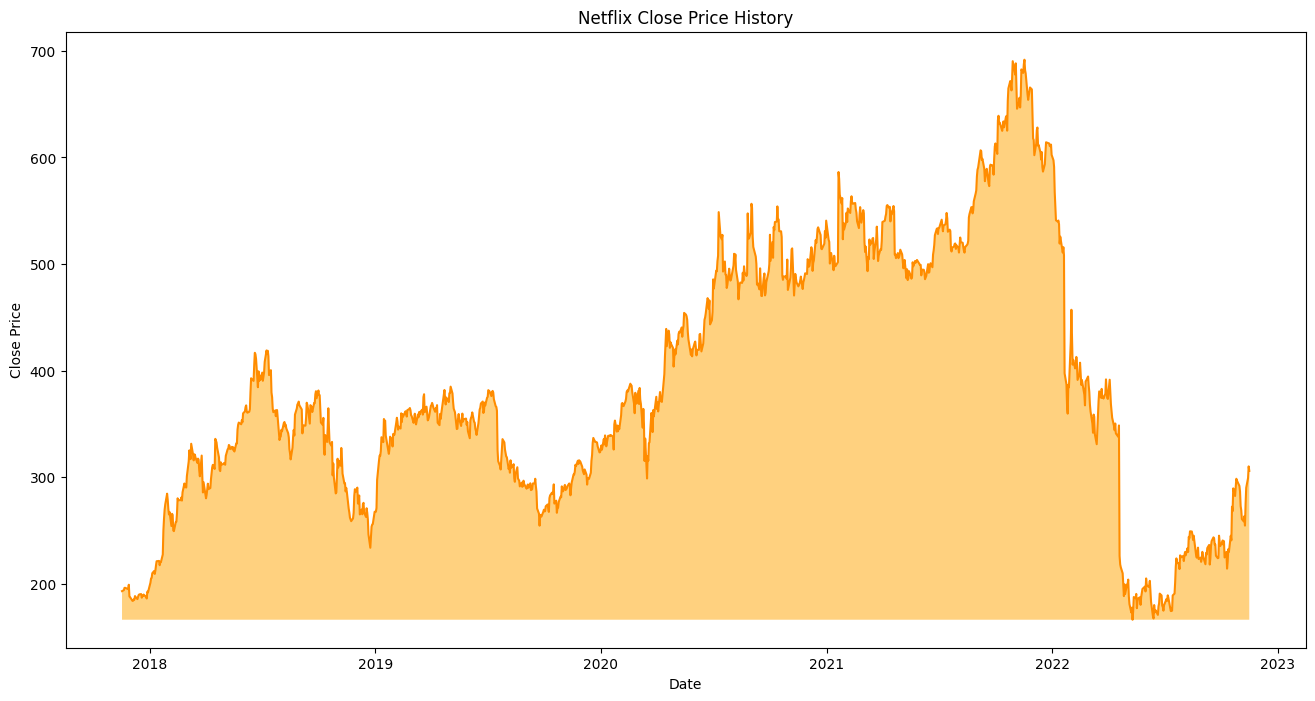

In [245]:
#Analyze the Netflix closing prices from datafrram
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
Closemin = df.Close.min()
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='NFLX Close Price History', color='darkorange')
plt.xlabel('Date')
plt.ylabel('Close Price')

# displaying the title
plt.title("Netflix Close Price History")
plt.fill_between(df.index, Closemin, df.Close, facecolor='orange', alpha = 0.5)

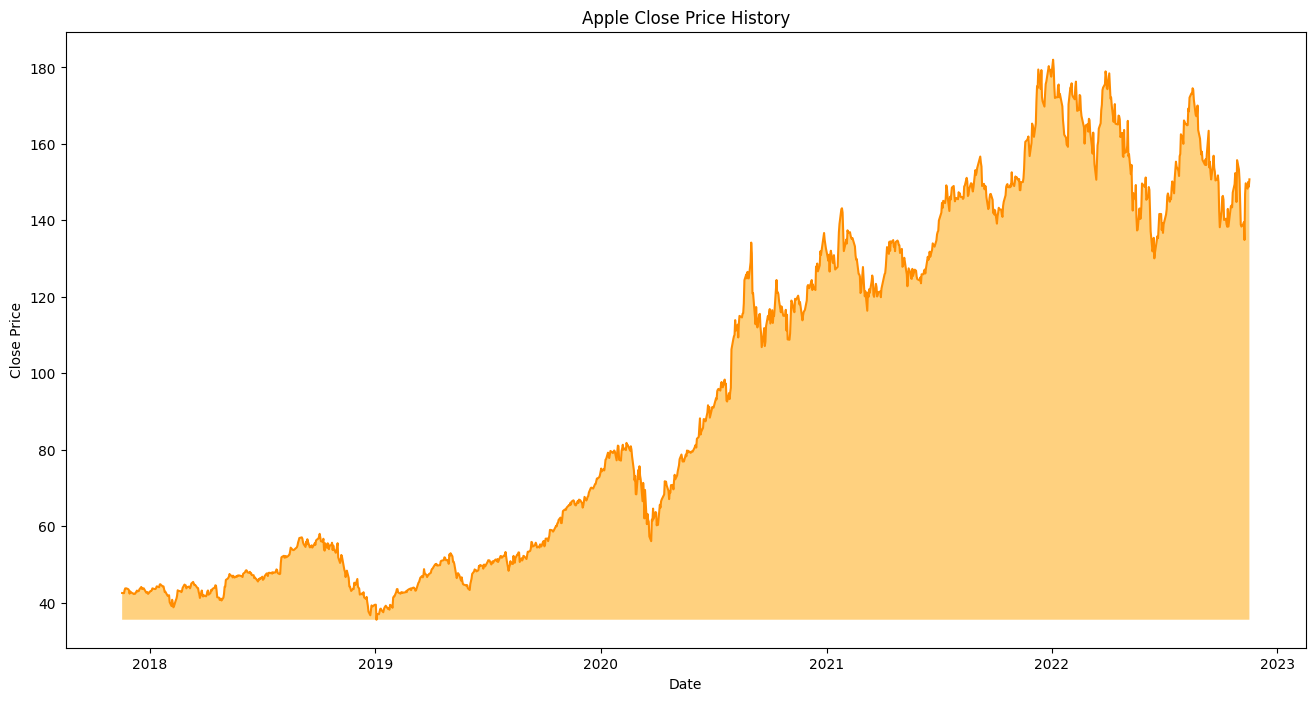

In [246]:
#Analyze the Apple closing prices from dataframe
df1["Date"]=pd.to_datetime(df1.Date,format="%Y-%m-%d")
df1.index=df1['Date']
Closemin = df1.Close.min()
plt.figure(figsize=(16,8))
plt.plot(df1["Close"],label='Apple Close Price History', color='darkorange')
plt.xlabel('Date')
plt.ylabel('Close Price')

# displaying the title
plt.title("Apple Close Price History")
plt.fill_between(df1.index, Closemin, df1.Close, facecolor='orange', alpha = 0.5)

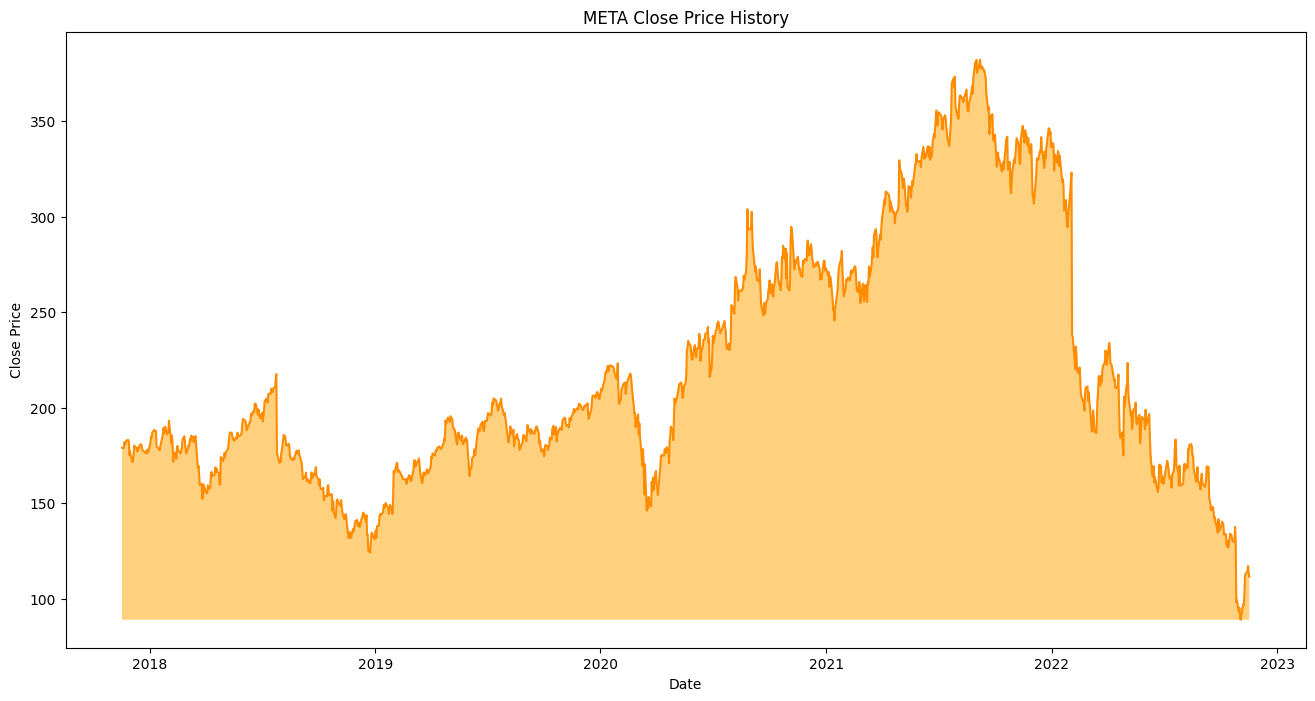

In [247]:
#Analyze the META closing prices from dataframe
df2["Date"]=pd.to_datetime(df2.Date,format="%Y-%m-%d")
df2.index=df2['Date']
Closemin = df2.Close.min()
plt.figure(figsize=(16,8))
plt.plot(df2["Close"],label='META Close Price History', color='darkorange')
plt.xlabel('Date')
plt.ylabel('Close Price')

# displaying the title
plt.title("META Close Price History")
plt.fill_between(df2.index, Closemin, df2.Close, facecolor='orange', alpha = 0.5)

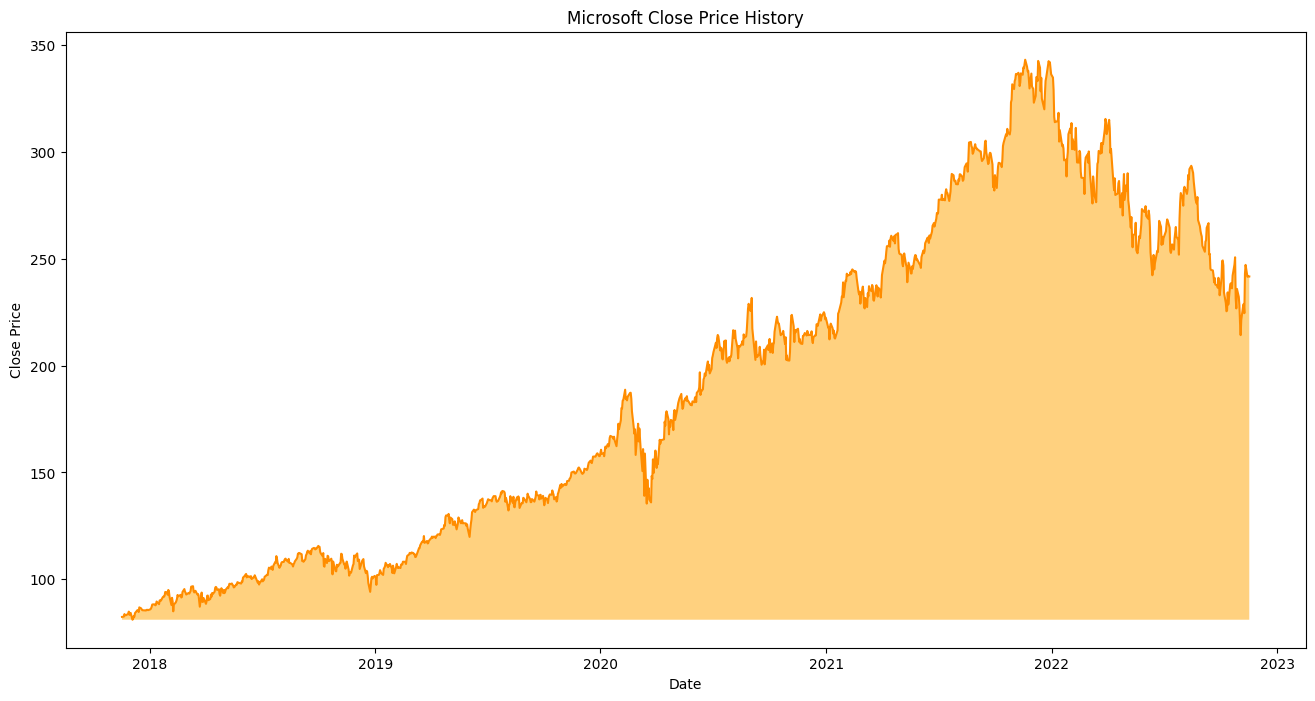

In [248]:
#Analyze the Microsoft closing prices from dataframe
df3["Date"]=pd.to_datetime(df3.Date,format="%Y-%m-%d")
df3.index=df3['Date']
Closemin = df3.Close.min()
plt.figure(figsize=(16,8))
plt.plot(df3["Close"],label='MSFT Close Price History', color='darkorange')
plt.xlabel('Date')
plt.ylabel('Close Price')

# displaying the title
plt.title("Microsoft Close Price History")
plt.fill_between(df3.index, Closemin, df3.Close, facecolor='orange', alpha = 0.5)

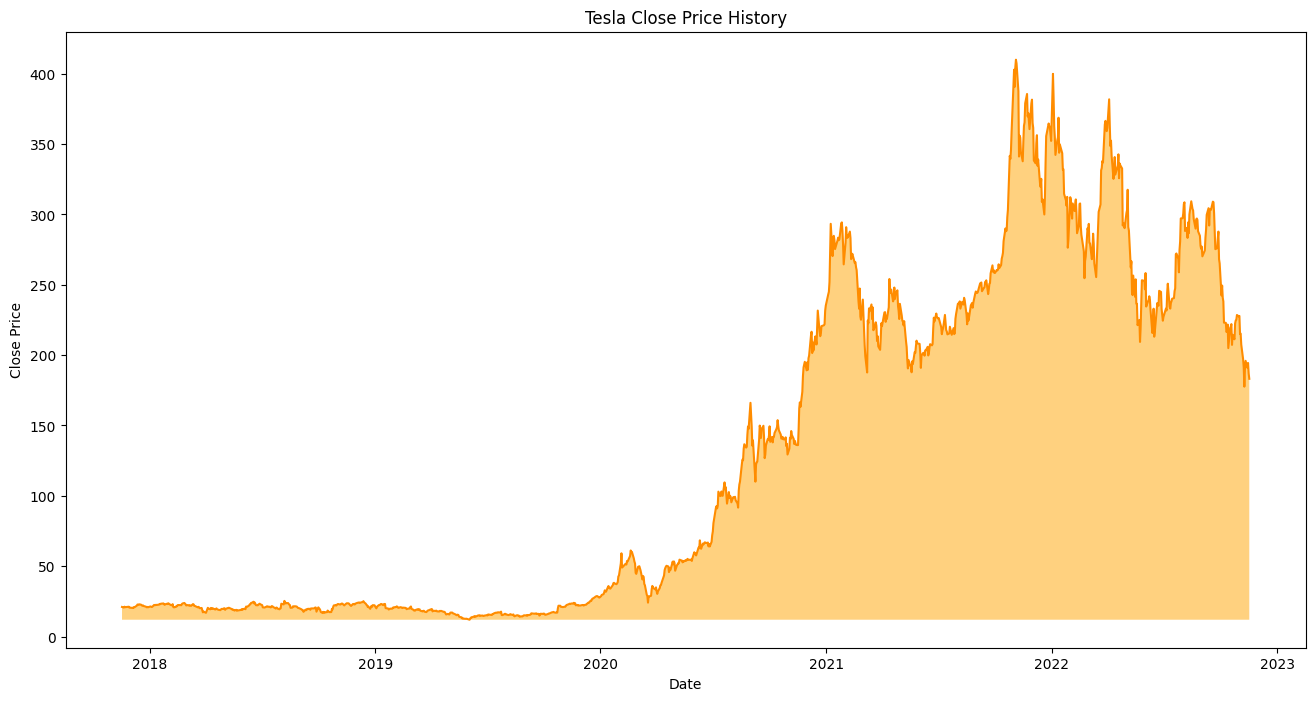

In [249]:
#Analyze the Tesla closing prices from dataframe
df4["Date"]=pd.to_datetime(df4.Date,format="%Y-%m-%d")
df4.index=df4['Date']
Closemin = df4.Close.min()
plt.figure(figsize=(16,8))
plt.plot(df4["Close"],label='Tesla Close Price History', color='darkorange')
plt.xlabel('Date')
plt.ylabel('Close Price')

# displaying the title
plt.title("Tesla Close Price History")
plt.fill_between(df4.index, Closemin, df4.Close, facecolor='orange', alpha = 0.5)

### Build and train the LSTM model for Netflix

In [250]:
#Sort the dataset on date time and filter “Date” and “Close” columns
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]
#Normalize the new filtered dataset:
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values

train_data=final_dataset[0:1007,:]
valid_data=final_dataset[1007:,:]

scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

#Build and train the LSTM model:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
lstm_model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy'])
#lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
# history = lstm_model.fit(x_train_data,y_train_data,
#                       epochs=1,
#                       batch_size=64,
#                       verbose=1,
#                       validation_data=(x_train_data,y_train_data))
# print("history.history:{}".format(history.history))

/Users/zhouhuiming/opt/miniconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [251]:
# Take a sample of a dataset to make stock price predictions using the LSTM model
X_test, Y_test=[],[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
    Y_test.append(inputs_data[i,0])
X_test=np.array(X_test)
#X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
Y_test=np.array(Y_test)
#Y_test=np.reshape(Y_test,(Y_test.shape[0],Y_test.shape[1],1))

predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

history = lstm_model.fit(x_train_data,y_train_data,
                       epochs=20,
                       batch_size=64,
                       verbose=1,
                       validation_data=(X_test, Y_test))
print("history.history:{}".format(history.history))

8/8 [==============================] - 2s 27ms/step
Epoch 1/20
15/15 [==============================] - 12s 232ms/step - loss: 0.0536 - accuracy: 0.0011 - val_loss: 0.0281 - val_accuracy: 0.0040
Epoch 2/20
15/15 [==============================] - 2s 115ms/step - loss: 0.0073 - accuracy: 0.0011 - val_loss: 0.0060 - val_accuracy: 0.0040
Epoch 3/20
15/15 [==============================] - 2s 119ms/step - loss: 0.0018 - accuracy: 0.0011 - val_loss: 0.0048 - val_accuracy: 0.0040
Epoch 4/20
15/15 [==============================] - 2s 126ms/step - loss: 0.0017 - accuracy: 0.0011 - val_loss: 0.0053 - val_accuracy: 0.0040
Epoch 5/20
15/15 [==============================] - 2s 129ms/step - loss: 0.0015 - accuracy: 0.0011 - val_loss: 0.0052 - val_accuracy: 0.0040
Epoch 6/20
15/15 [==============================] - 2s 115ms/step - loss: 0.0015 - accuracy: 0.0011 - val_loss: 0.0049 - val_accuracy: 0.0040
Epoch 7/20
15/15 [==============================] - 2s 116ms/step - loss: 0.0015 - accuracy: 0.

/var/folders/z1/5pgcx1wx2sg787l7nd3vy8h40000gn/T/ipykernel_25801/1638199167.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


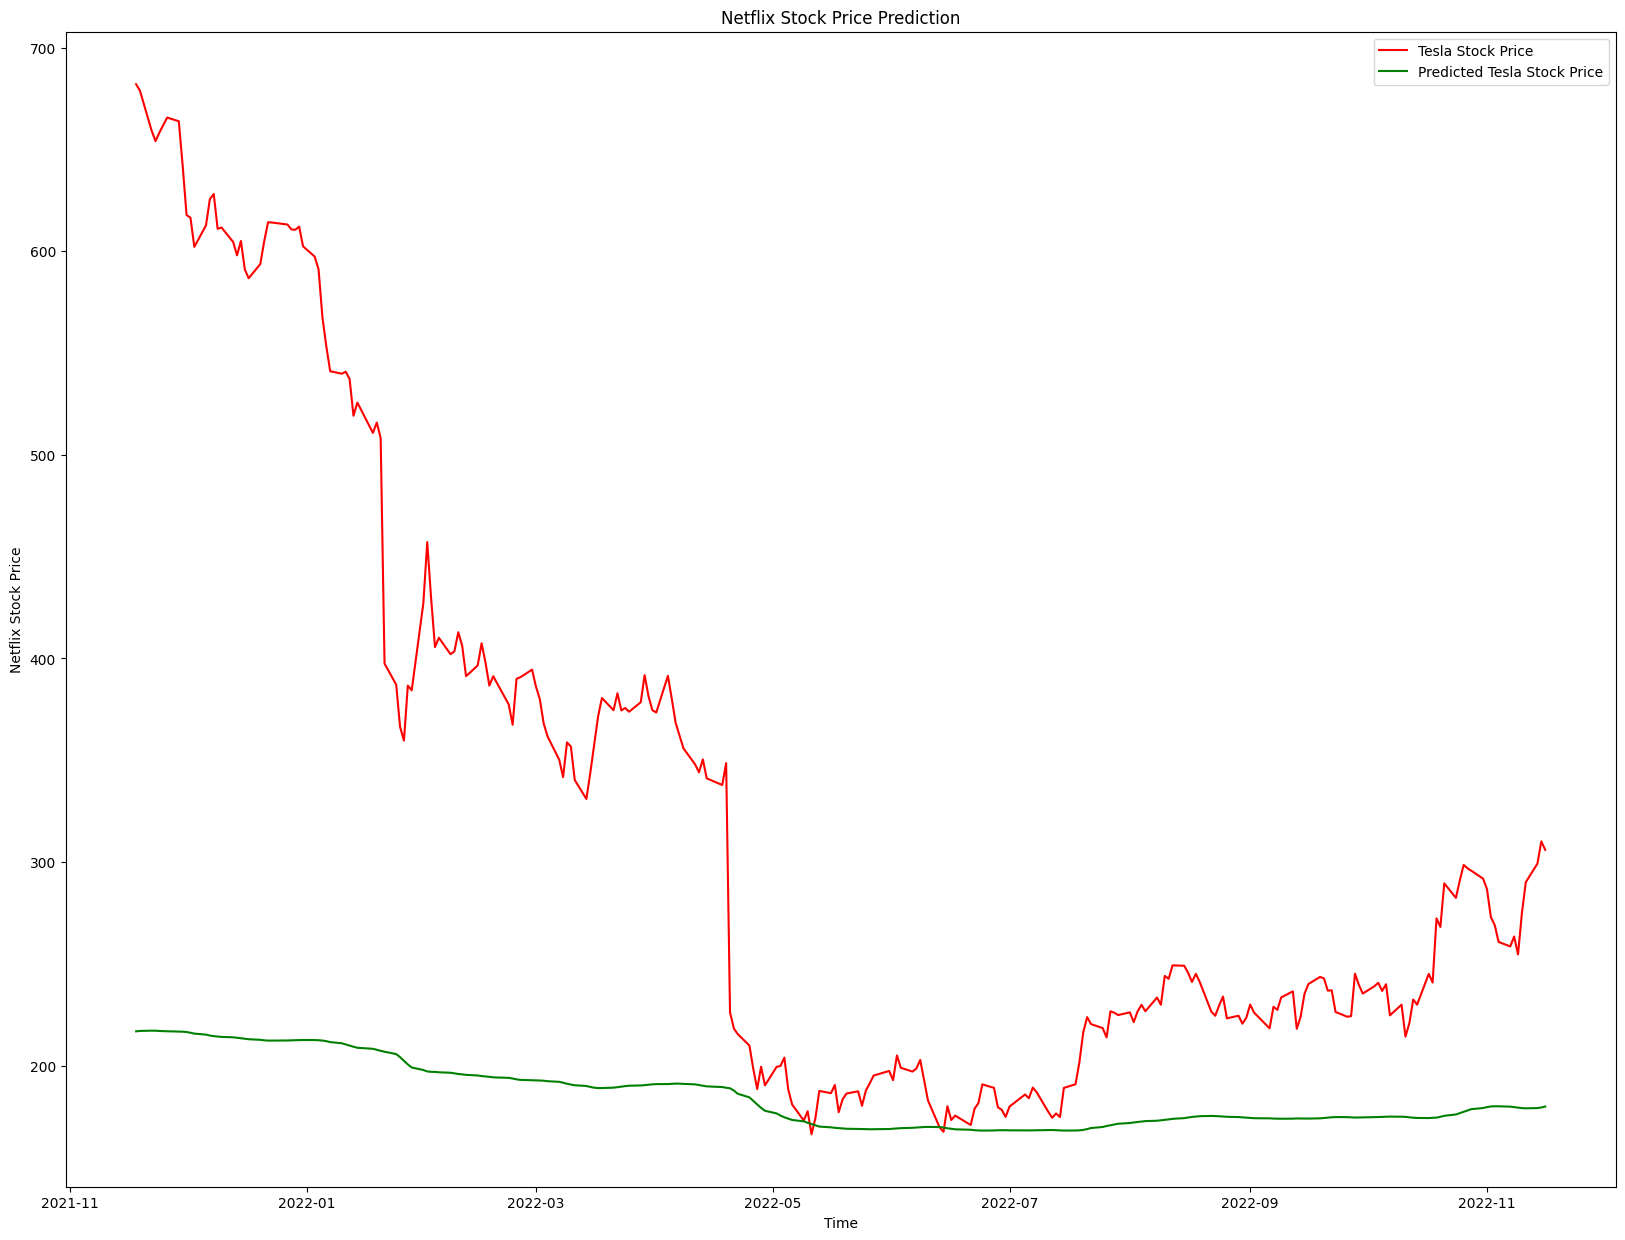

In [252]:
#Save the LSTM model
lstm_model.save("saved_model_NFLX.h5")

#Visualize the predicted stock costs with actual stock costs
train_data=new_dataset[:1007]
valid_data=new_dataset[1007:]

valid_data['Predictions']=predicted_closing_price
plt.plot(valid_data['Close'], color = 'red', label = 'Tesla Stock Price')
plt.plot(valid_data['Predictions'], color = 'green', label = 'Predicted Tesla Stock Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')

# displaying the title
plt.title("Netflix Stock Price Prediction")
plt.show()


### Build and train the LSTM model for Apple

In [253]:
#Sort the dataset on date time and filter “Date” and “Close” columns
data1=df1.sort_index(ascending=True,axis=0)
new_dataset1=pd.DataFrame(index=range(0,len(df1)),columns=['Date','Close'])
for i in range(0,len(data1)):
    new_dataset1["Date"][i]=data1['Date'][i]
    new_dataset1["Close"][i]=data1["Close"][i]

#Normalize the new filtered dataset:
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset1.index=new_dataset1.Date
new_dataset1.drop("Date",axis=1,inplace=True)
final_dataset1=new_dataset1.values

train_data1=final_dataset1[0:1007,:]
valid_data1=final_dataset1[1007:,:]

scaled_data1=scaler.fit_transform(final_dataset1)
x_train_data1,y_train_data1=[],[]
for i in range(60,len(train_data1)):
    x_train_data1.append(scaled_data1[i-60:i,0])
    y_train_data1.append(scaled_data1[i,0])

x_train_data1,y_train_data1=np.array(x_train_data1),np.array(y_train_data1)
x_train_data1=np.reshape(x_train_data1,(x_train_data1.shape[0],x_train_data1.shape[1],1))

#Build and train the LSTM model:
lstm_model1=Sequential()
lstm_model1.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data1.shape[1],1)))
lstm_model1.add(LSTM(units=50))
lstm_model1.add(Dense(1))
inputs_data1=new_dataset1[len(new_dataset1)-len(valid_data1)-60:].values
inputs_data1=inputs_data1.reshape(-1,1)
inputs_data1=scaler.transform(inputs_data1)
lstm_model1.compile(loss='mean_squared_error',optimizer='adam')
lstm_model1.fit(x_train_data1,y_train_data1,epochs=1,batch_size=1,verbose=2)

947/947 - 45s - loss: 0.0019 - 45s/epoch - 47ms/step


8/8 [==============================] - 2s 29ms/step


/var/folders/z1/5pgcx1wx2sg787l7nd3vy8h40000gn/T/ipykernel_25801/1767354640.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data1['Predictions']=predicted_closing_price1


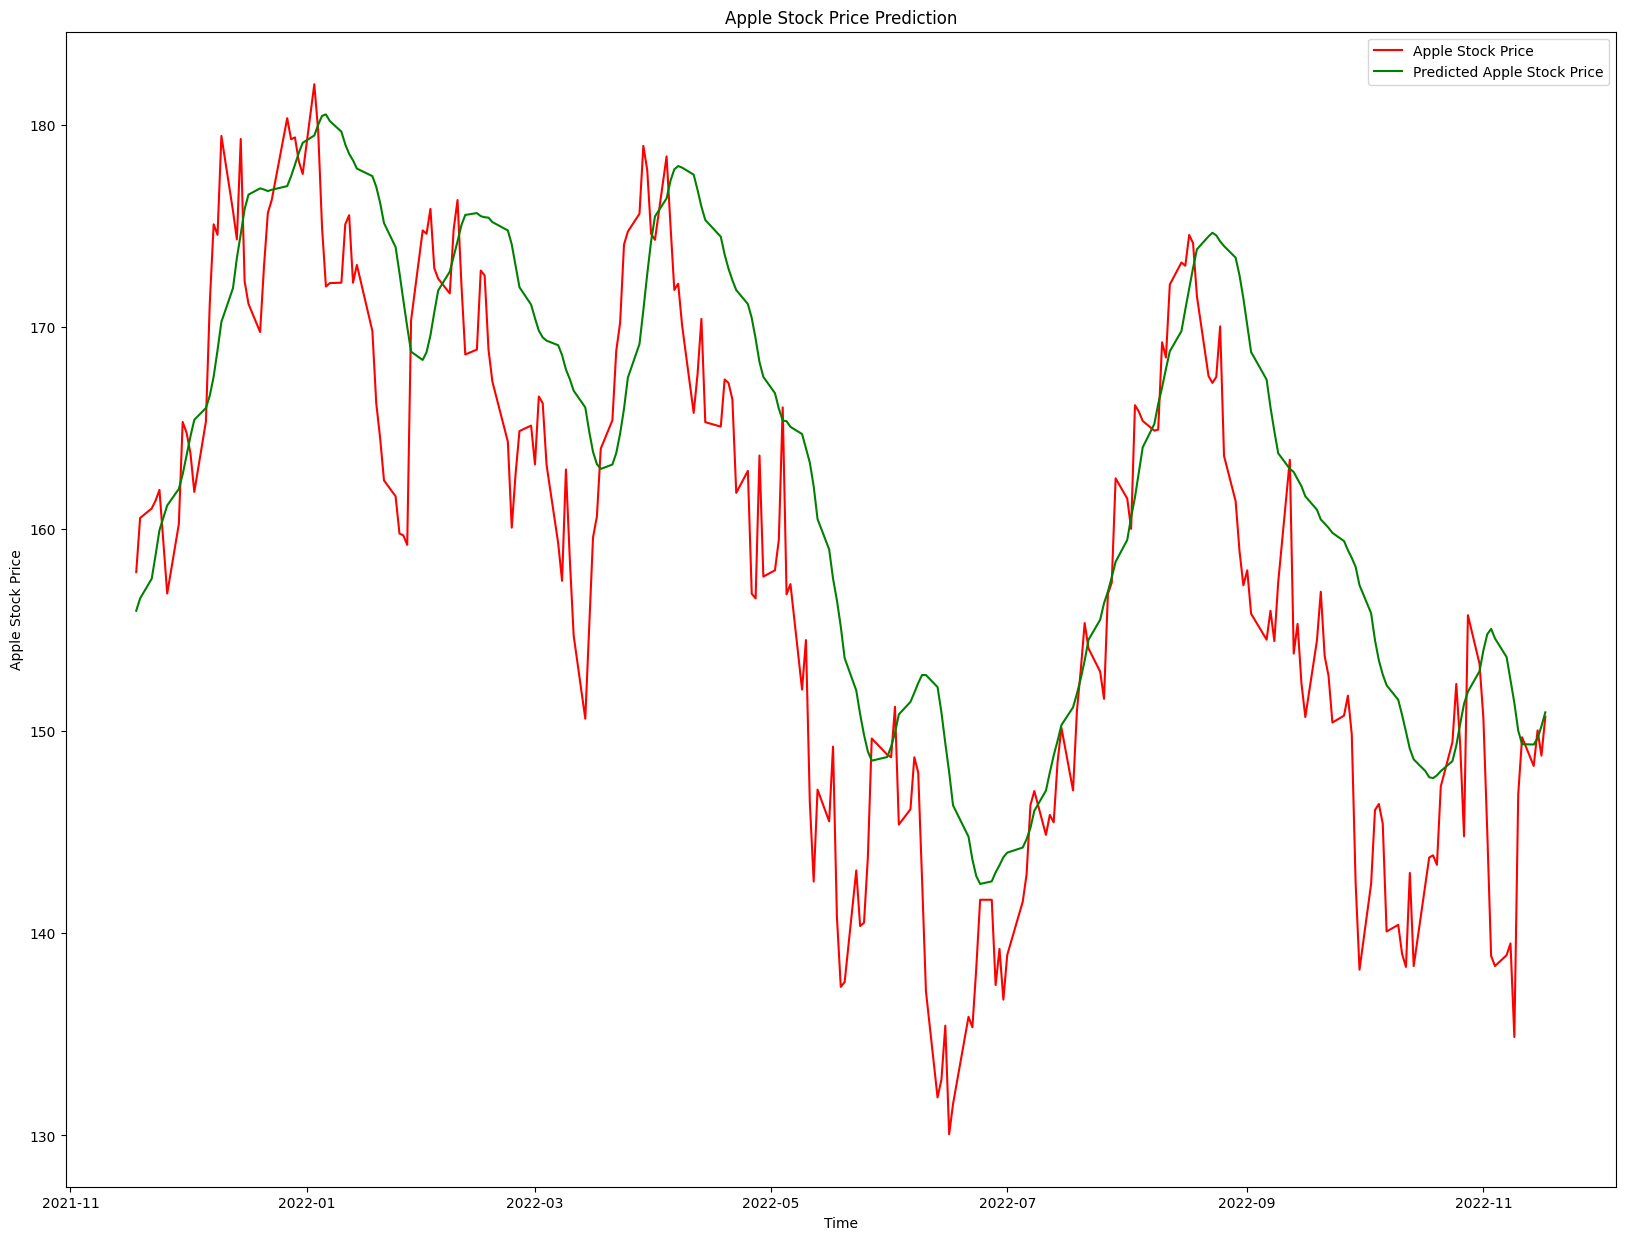

In [254]:
# Take a sample of a dataset to make stock price predictions using the LSTM model
X_test1=[]
for i in range(60,inputs_data1.shape[0]):
    X_test1.append(inputs_data1[i-60:i,0])
X_test1=np.array(X_test1)
X_test1=np.reshape(X_test1,(X_test1.shape[0],X_test1.shape[1],1))
predicted_closing_price1=lstm_model1.predict(X_test1)
predicted_closing_price1=scaler.inverse_transform(predicted_closing_price1)
#Save the LSTM model
lstm_model1.save("saved_model_AAPL.h5")

#Visualize the predicted stock costs with actual stock costs
train_data1=new_dataset1[:1007]
valid_data1=new_dataset1[1007:]
valid_data1['Predictions']=predicted_closing_price1
#plt.plot(train_data1["Close"])
#plt.plot(valid_data1[['Close',"Predictions"]])
plt.plot(valid_data1['Close'], color = 'red', label = 'Apple Stock Price')
plt.plot(valid_data1['Predictions'], color = 'green', label = 'Predicted Apple Stock Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')

# displaying the title
plt.title("Apple Stock Price Prediction")
plt.show()


### Build and train the LSTM model for META

In [255]:
#Sort the dataset on date time and filter “Date” and “Close” columns
data2=df2.sort_index(ascending=True,axis=0)
new_dataset2=pd.DataFrame(index=range(0,len(df2)),columns=['Date','Close'])
for i in range(0,len(data2)):
    new_dataset2["Date"][i]=data2['Date'][i]
    new_dataset2["Close"][i]=data2["Close"][i]




In [256]:
#Normalize the new filtered dataset:
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset2.index=new_dataset2.Date
new_dataset2.drop("Date",axis=1,inplace=True)
final_dataset2=new_dataset2.values

train_data2=final_dataset2[0:1007,:]
valid_data2=final_dataset2[1007:,:]

scaled_data2=scaler.fit_transform(final_dataset2)
x_train_data2,y_train_data2=[],[]
for i in range(60,len(train_data2)):
    x_train_data2.append(scaled_data2[i-60:i,0])
    y_train_data2.append(scaled_data2[i,0])

x_train_data2,y_train_data1=np.array(x_train_data2),np.array(y_train_data2)
x_train_data2=np.reshape(x_train_data2,(x_train_data2.shape[0],x_train_data2.shape[1],1))



In [257]:
#Build and train the LSTM model:
lstm_model2=Sequential()
lstm_model2.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
lstm_model2.add(LSTM(units=50))
lstm_model2.add(Dense(1))
inputs_data2=new_dataset2[len(new_dataset2)-len(valid_data2)-60:].values
inputs_data2=inputs_data2.reshape(-1,1)
inputs_data2=scaler.transform(inputs_data2)
lstm_model2.compile(loss='mean_squared_error',optimizer='adam')
lstm_model2.fit(np.asarray(x_train_data2),np.asarray(y_train_data2),epochs=1,batch_size=1,verbose=2)

947/947 - 47s - loss: 0.0028 - 47s/epoch - 50ms/step


8/8 [==============================] - 2s 30ms/step


/var/folders/z1/5pgcx1wx2sg787l7nd3vy8h40000gn/T/ipykernel_25801/1142219667.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data2['Predictions']=predicted_closing_price2


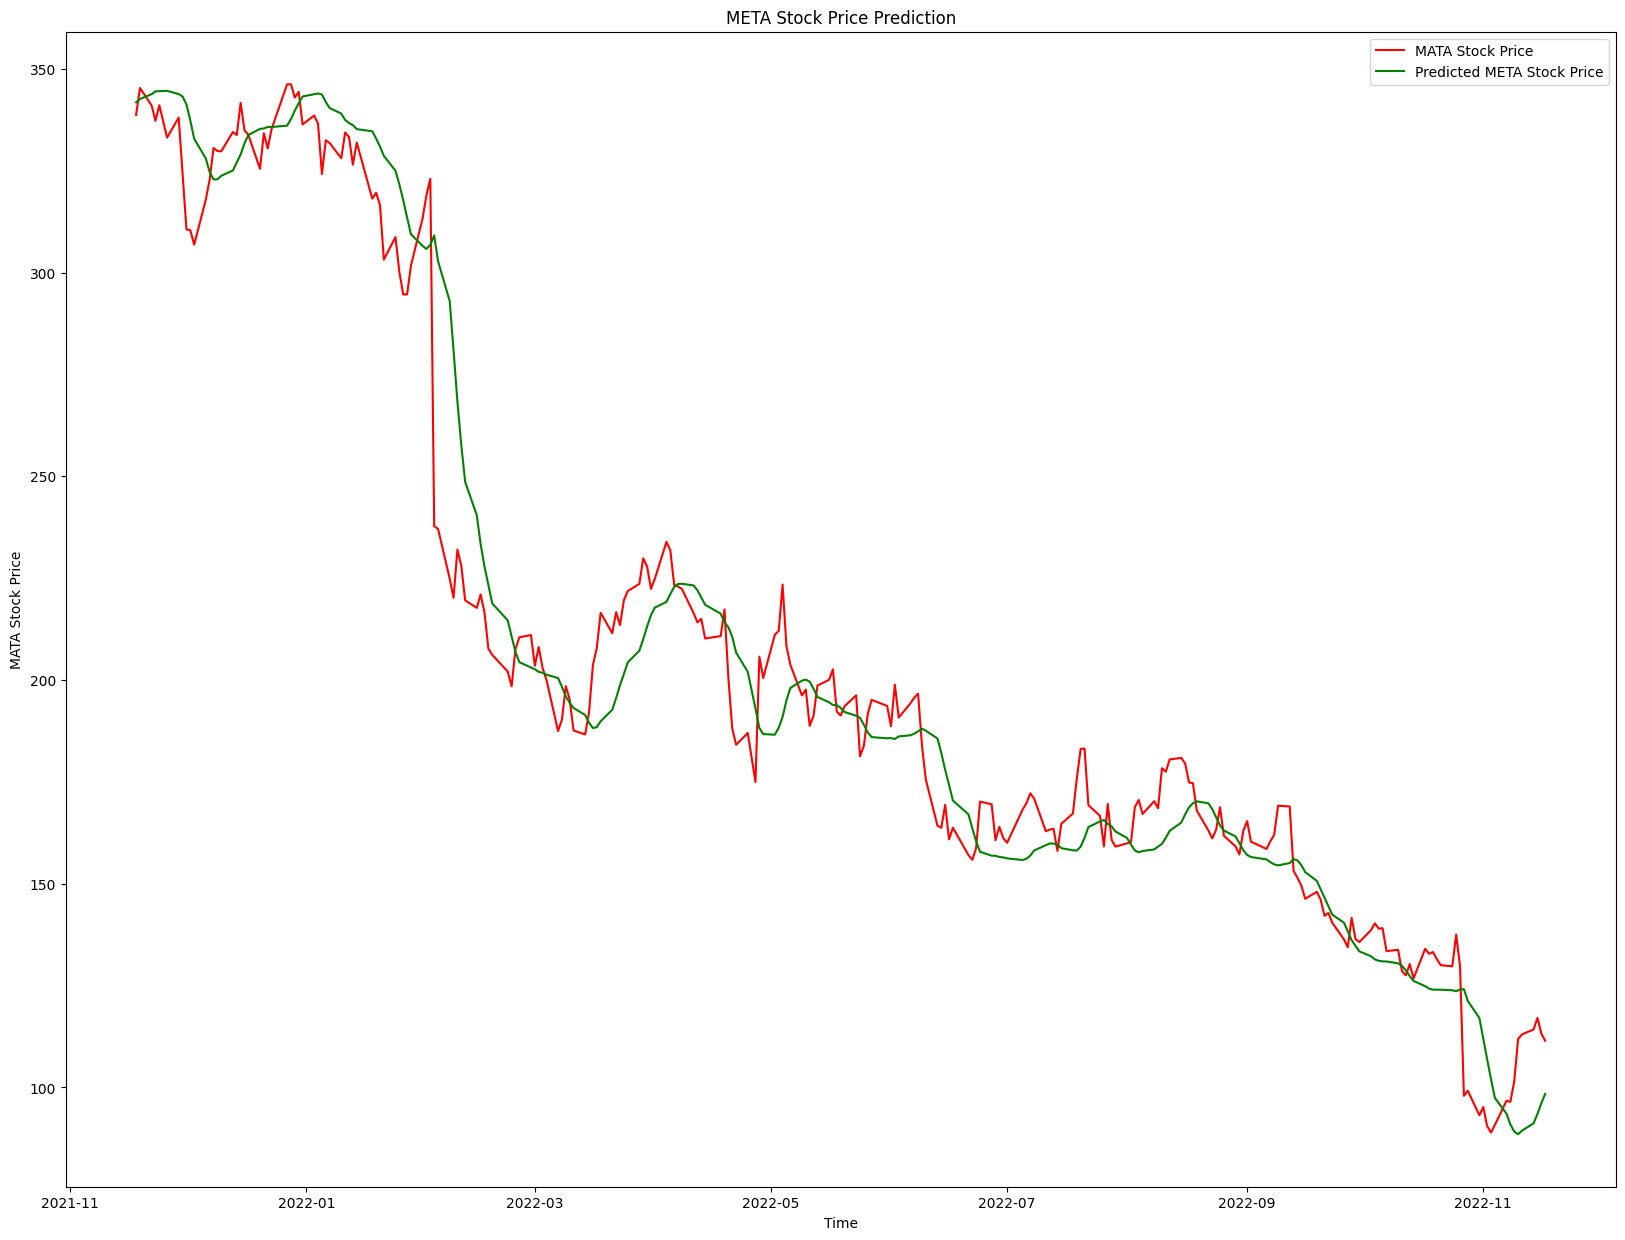

In [258]:
# Take a sample of a dataset to make stock price predictions using the LSTM model
X_test2=[]
for i in range(60,inputs_data2.shape[0]):
    X_test2.append(inputs_data2[i-60:i,0])
X_test2=np.array(X_test2)
X_test2=np.reshape(X_test2,(X_test2.shape[0],X_test2.shape[1],1))
predicted_closing_price2=lstm_model2.predict(X_test2)
predicted_closing_price2=scaler.inverse_transform(predicted_closing_price2)
#Save the LSTM model
lstm_model2.save("saved_model_META.h5")

#Visualize the predicted stock costs with actual stock costs
train_data2=new_dataset2[:1007]
valid_data2=new_dataset2[1007:]
valid_data2['Predictions']=predicted_closing_price2

plt.plot(valid_data2['Close'], color = 'red', label = 'MATA Stock Price')
plt.plot(valid_data2['Predictions'], color = 'green', label = 'Predicted META Stock Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('MATA Stock Price')

# displaying the title
plt.title("META Stock Price Prediction")
plt.show()

### Build and train the LSTM model for Microsoft

In [259]:
#Sort the dataset on date time and filter “Date” and “Close” columns
data3=df3.sort_index(ascending=True,axis=0)
new_dataset3=pd.DataFrame(index=range(0,len(df3)),columns=['Date','Close'])
for i in range(0,len(data3)):
    new_dataset3["Date"][i]=data3['Date'][i]
    new_dataset3["Close"][i]=data3["Close"][i]

#Normalize the new filtered dataset:
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset3.index=new_dataset3.Date
new_dataset3.drop("Date",axis=1,inplace=True)
final_dataset3=new_dataset3.values

train_data3=final_dataset3[0:1007,:]
valid_data3=final_dataset3[1007:,:]

scaled_data3=scaler.fit_transform(final_dataset3)
x_train_data3,y_train_data3=[],[]
for i in range(60,len(train_data3)):
    x_train_data3.append(scaled_data3[i-60:i,0])
    y_train_data3.append(scaled_data3[i,0])

x_train_data3,y_train_data3=np.array(x_train_data3),np.array(y_train_data3)
x_train_data3=np.reshape(x_train_data3,(x_train_data3.shape[0],x_train_data3.shape[1],1))

#Build and train the LSTM model:
lstm_model3=Sequential()
lstm_model3.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data3.shape[1],1)))
lstm_model3.add(LSTM(units=50))
lstm_model3.add(Dense(1))
inputs_data3=new_dataset3[len(new_dataset3)-len(valid_data3)-60:].values
inputs_data3=inputs_data3.reshape(-1,1)
inputs_data3=scaler.transform(inputs_data3)
lstm_model3.compile(loss='mean_squared_error',optimizer='adam')
lstm_model3.fit(x_train_data3,y_train_data3,epochs=1,batch_size=1,verbose=2)

947/947 - 44s - loss: 0.0022 - 44s/epoch - 46ms/step


8/8 [==============================] - 2s 26ms/step


/var/folders/z1/5pgcx1wx2sg787l7nd3vy8h40000gn/T/ipykernel_25801/174300738.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data3['Predictions']=predicted_closing_price3


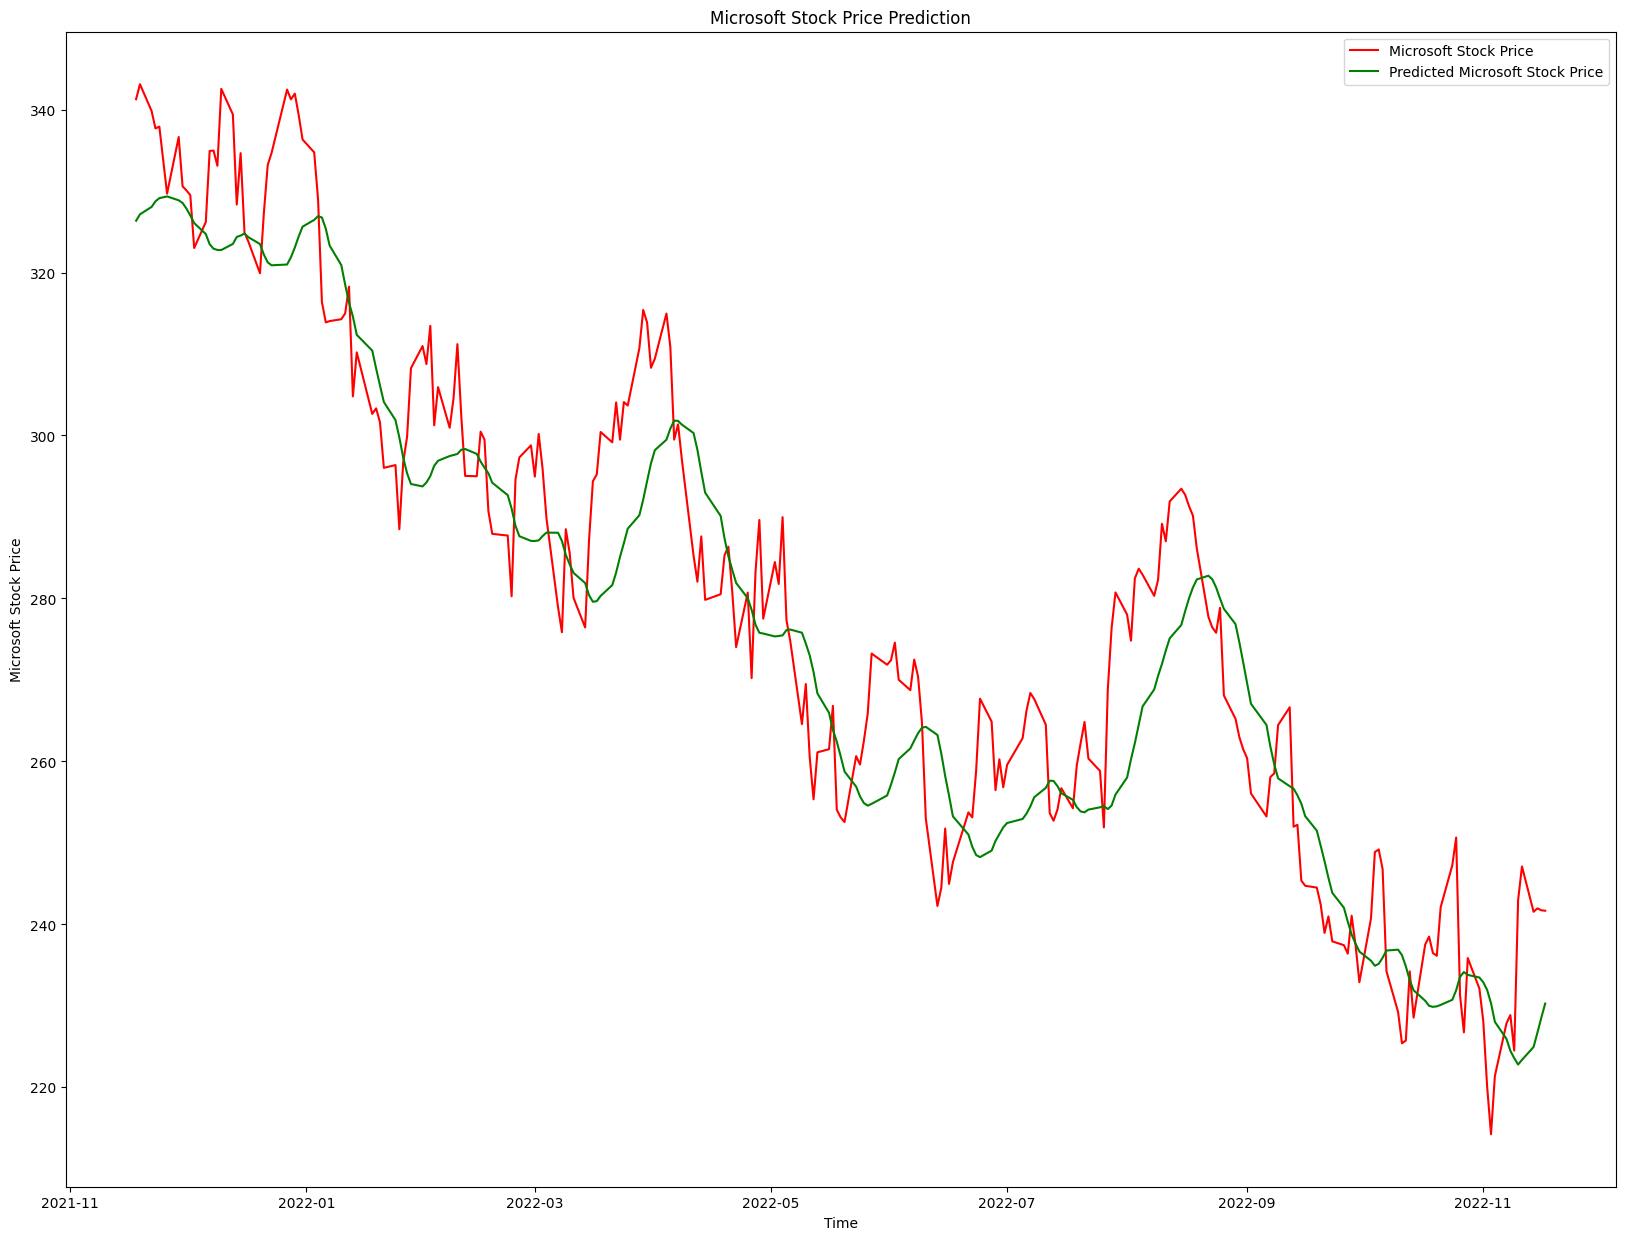

In [260]:
# Take a sample of a dataset to make stock price predictions using the LSTM model
X_test3=[]
for i in range(60,inputs_data3.shape[0]):
    X_test3.append(inputs_data3[i-60:i,0])
X_test3=np.array(X_test3)
X_test3=np.reshape(X_test3,(X_test3.shape[0],X_test3.shape[1],1))
predicted_closing_price3=lstm_model3.predict(X_test3)
predicted_closing_price3=scaler.inverse_transform(predicted_closing_price3)
#Save the LSTM model
lstm_model1.save("saved_model_MSFT.h5")

#Visualize the predicted stock costs with actual stock costs
train_data3=new_dataset3[:1007]
valid_data3 = new_dataset3[1007:]
valid_data3['Predictions']=predicted_closing_price3
#plt.plot(train_data1["Close"])
#plt.plot(valid_data1[['Close',"Predictions"]])
plt.plot(valid_data3['Close'], color = 'red', label = 'Microsoft Stock Price')
plt.plot(valid_data3['Predictions'], color = 'green', label = 'Predicted Microsoft Stock Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')

# displaying the title
plt.title("Microsoft Stock Price Prediction")
plt.show()


### Build and train the LSTM model for Tesla

In [261]:
#Sort the dataset on date time and filter “Date” and “Close” columns
data4=df4.sort_index(ascending=True,axis=0)
new_dataset4=pd.DataFrame(index=range(0,len(df4)),columns=['Date','Close'])
for i in range(0,len(data4)):
    new_dataset4["Date"][i]=data4['Date'][i]
    new_dataset4["Close"][i]=data4["Close"][i]

#Normalize the new filtered dataset:
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset4.index=new_dataset4.Date
new_dataset4.drop("Date",axis=1,inplace=True)
final_dataset4=new_dataset4.values

train_data4=final_dataset4[0:1007,:]
valid_data4=final_dataset4[1007:,:]

scaled_data4=scaler.fit_transform(final_dataset4)
x_train_data4,y_train_data4=[],[]
for i in range(60,len(train_data4)):
    x_train_data4.append(scaled_data4[i-60:i,0])
    y_train_data4.append(scaled_data4[i,0])

x_train_data4,y_train_data4=np.array(x_train_data4),np.array(y_train_data4)
x_train_data4=np.reshape(x_train_data4,(x_train_data4.shape[0],x_train_data4.shape[1],1))

#Build and train the LSTM model:
lstm_model4=Sequential()
lstm_model4.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data4.shape[1],1)))
lstm_model4.add(LSTM(units=50))
lstm_model4.add(Dense(1))
inputs_data4=new_dataset4[len(new_dataset4)-len(valid_data4)-60:].values
inputs_data4=inputs_data4.reshape(-1,1)
inputs_data4=scaler.transform(inputs_data4)
lstm_model4.compile(loss='mean_squared_error',optimizer='adam')
lstm_model4.fit(x_train_data4,y_train_data4,epochs=1,batch_size=1,verbose=2)

947/947 - 43s - loss: 0.0023 - 43s/epoch - 45ms/step


8/8 [==============================] - 2s 26ms/step


/var/folders/z1/5pgcx1wx2sg787l7nd3vy8h40000gn/T/ipykernel_25801/3397457096.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data4['Predictions']=predicted_closing_price4


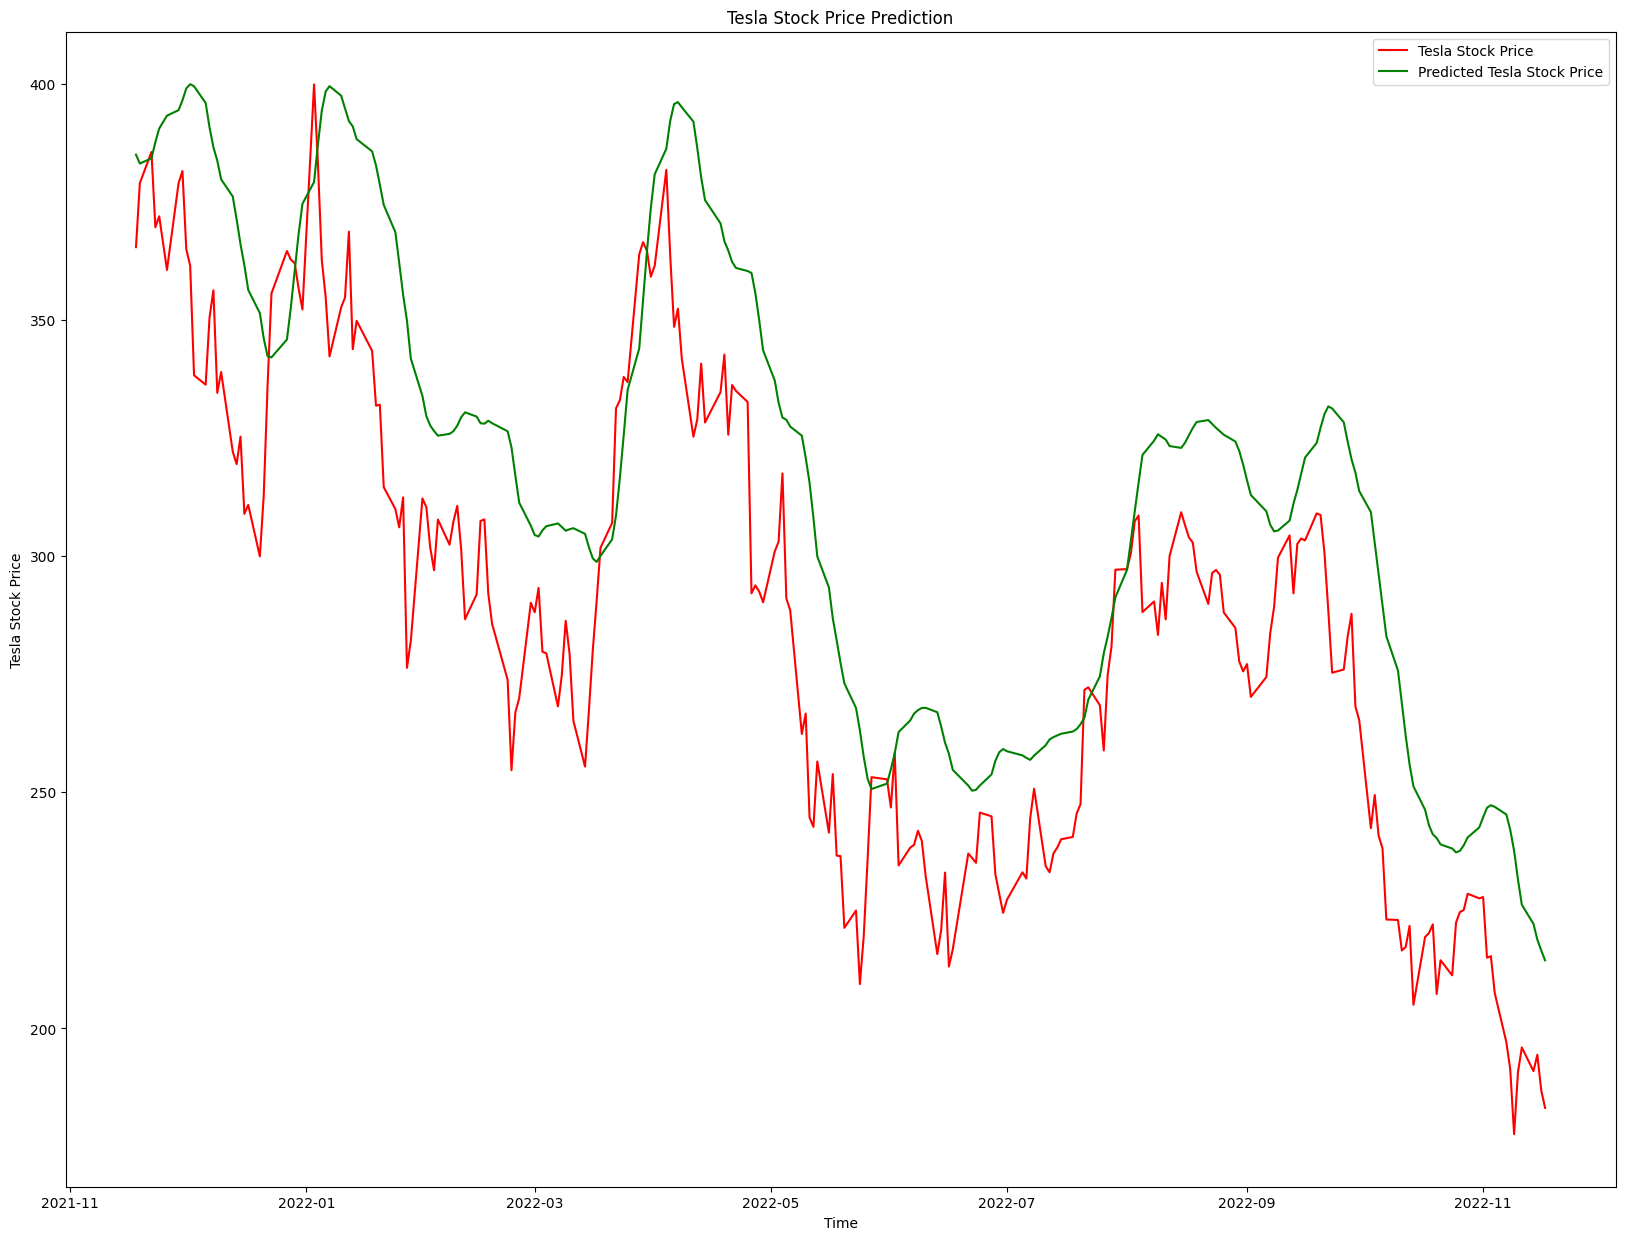

In [262]:
# Take a sample of a dataset to make stock price predictions using the LSTM model
X_test4=[]
for i in range(60,inputs_data4.shape[0]):
    X_test4.append(inputs_data4[i-60:i,0])
X_test4=np.array(X_test4)
X_test4=np.reshape(X_test4,(X_test4.shape[0],X_test4.shape[1],1))
predicted_closing_price4=lstm_model4.predict(X_test4)
predicted_closing_price4=scaler.inverse_transform(predicted_closing_price4)
#Save the LSTM model
lstm_model4.save("saved_model_TSLA.h5")

#Visualize the predicted stock costs with actual stock costs
train_data4=new_dataset4[:1007]
valid_data4 = new_dataset4[1007:]
valid_data4['Predictions']=predicted_closing_price4
#plt.plot(train_data1["Close"])
#plt.plot(valid_data1[['Close',"Predictions"]])
plt.plot(valid_data4['Close'], color = 'red', label = 'Tesla Stock Price')
plt.plot(valid_data4['Predictions'], color = 'green', label = 'Predicted Tesla Stock Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')

# displaying the title
plt.title("Tesla Stock Price Prediction")
plt.show()


In [ ]:
!python3 stock_app.py

2022-12-12 19:16:38.910120: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 19:16:48.877331: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
8/8 [==============================] - 2s 24ms/step
/Users/zhouhuiming/PycharmProjects/CS5100-Project/stock_app.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p